[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/giswqs/geemap/blob/master/docs/workshops/AmericaView_2023.ipynb)

**Interactive Cloud Computing with Google Earth Engine and Geemap**

**Introduction:** This is a notebook prepared for the workshop at the [AmericaView](https://americaview.org/) Annual Conference at Lafayette, Louisiana on March 13, 2023.

**Overview:** Google Earth Engine ([GEE](https://earthengine.google.com/)) is a cloud computing platform with a multi-petabyte catalog of satellite imagery and geospatial datasets. It enables scientists, researchers, and developers to analyze and visualize changes on the Earth’s surface. The [geemap](https://geemap.org/) Python package provides GEE users with an intuitive interface to manipulate, analyze, and visualize geospatial big data interactively in a Jupyter-based environment. The topics will be covered in this workshop include: (1) introducing geemap and the Earth Engine Python API; (2) creating interactive maps; (3) searching GEE data catalog; (4) visualizing GEE datasets; (5) analyzing GEE datasets, and (6) exporting GEE datasets. More information about the geemap Python package can be found at <https://geemap.org>.

**Requirement:** Please [sign up](https://earthengine.google.com/signup/) for a Google Earth Engine account if you don’t have one yet. No software installation is needed. You just need a browser with Internet access for this workshop.


## Why Earth Engine Python API and geemap?

Check out the slides [here](https://docs.google.com/presentation/d/1VpfKNG5aubcNLIu89MHMxwwiXBJea4BBYnWukRV_XHs/edit?pli=1#slide=id.gb3de725ea9_0_788).

## Install packages

In [ ]:
# %pip install geemap

## Import libraries

In [ ]:
import ee
import geemap.foliumap as geemap

## Authenticate Earth Engine

You will need to create a [Google Cloud Project](https://console.cloud.google.com/projectcreate) and enable the [Earth Engine API](https://console.cloud.google.com/apis/api/earthengine.googleapis.com) for the project. You can find detailed instructions [here](https://book.geemap.org/chapters/01_introduction.html#earth-engine-authentication).

In [ ]:
geemap.ee_initialize()

## Create interactive maps

Let's create an interactive map using the `ipyleaflet` plotting backend. The [`geemap.Map`](https://geemap.org/geemap/#geemap.geemap.Map) class inherits from the [`ipyleaflet.Map`](https://ipyleaflet.readthedocs.io/en/latest/map_and_basemaps/map.html) class. Therefore, you can use the same syntax to create an interactive map as you would with `ipyleaflet.Map`.

In [ ]:
Map = geemap.Map()

To display it in a Jupyter notebook, simply ask for the object representation:

In [ ]:
Map

To customize the map, you can specify various keyword arguments, such as `center` ([lat, lon]), `zoom`, `width`, and `height`. The default `width` is `100%`, which takes up the entire cell width of the Jupyter notebook. The `height` argument accepts a number or a string. If a number is provided, it represents the height of the map in pixels. If a string is provided, the string must be in the format of a number followed by `px`, e.g., `600px`.

In [ ]:
Map = geemap.Map(center=[40, -100], zoom=4, height=600)
Map

To hide a control, set `control_name` to `False`, e.g., `draw_ctrl=False`.

In [ ]:
Map = geemap.Map(data_ctrl=False, toolbar_ctrl=False, draw_ctrl=False)
Map

## Adding basemaps

There are several ways to add basemaps to a map. You can specify the basemap to use in the `basemap` keyword argument when creating the map. Alternatively, you can add basemap layers to the map using the `add_basemap` method. Geemap has hundreds of built-in basemaps available that can be easily added to the map with only one line of code.

### Built-in basemaps

Create a map by specifying the basemap to use as follows. For example, the `HYBRID` basemap represents the Google Satellite Hybrid basemap.

In [ ]:
Map = geemap.Map(basemap='HYBRID')
Map

You can add as many basemaps as you like to the map. For example, the following code adds the `OpenTopoMap` basemap to the map above:

In [ ]:
Map.add_basemap('OpenTopoMap')

Print out the first 10 basemaps:

In [ ]:
basemaps = list(geemap.basemaps.keys())
len(geemap.basemaps)

In [ ]:
basemaps[:10]

### XYZ tiles

You can also add XYZ tile layers to the map using the `Map.add_tile_layer()` method. For example, the following code creates an interactive map and adds the Google Terrain basemap to it:

In [ ]:
Map = geemap.Map()
Map.add_tile_layer(
    url="https://mt1.google.com/vt/lyrs=p&x={x}&y={y}&z={z}",
    name="Google Terrain",
    attribution="Google",
)
Map

### WMS tiles

Similarly, you can add WMS tile layers to the map using the `Map.add_wms_layer()` method. For example, the following code creates an interactive map and adds the National Land Cover Database (NLCD) 2019 basemap to it:

In [ ]:
Map = geemap.Map(center=[40, -100], zoom=4)
url = 'https://www.mrlc.gov/geoserver/mrlc_display/NLCD_2019_Land_Cover_L48/wms?'
Map.add_wms_layer(
    url=url,
    layers='NLCD_2019_Land_Cover_L48',
    name='NLCD 2019',
    format='image/png',
    attribution='MRLC',
    transparent=True,
)
Map

## Earth Engine data types

Earth Engine objects are server-side objects rather than client-side objects, which means that they are not stored locally on your computer. Similar to video streaming services (e.g., YouTube, Netflix, and Hulu), which store videos/movies on their servers, Earth Engine data are stored on the Earth Engine servers. We can stream geospatial data from Earth Engine on-the-fly without having to download the data just like we can watch videos from streaming services using a web browser without having to download the entire video to your computer.

-   **Image**: the fundamental raster data type in Earth Engine.
-   **ImageCollection**: a stack or time-series of images.
-   **Geometry**: the fundamental vector data type in Earth Engine.
-   **Feature**: a Geometry with attributes.
-   **FeatureCollection**: a set of features.

### Image

Raster data in Earth Engine are represented as **Image** objects. Images are composed of one or more bands and each band has its own name, data type, scale, mask and projection. Each image has metadata stored as a set of properties.

#### Loading Earth Engine images

In [ ]:
image = ee.Image('USGS/SRTMGL1_003')
image

#### Visualizing Earth Engine images

In [ ]:
Map = geemap.Map(center=[21.79, 70.87], zoom=3)
image = ee.Image('USGS/SRTMGL1_003')
vis_params = {
    'min': 0,
    'max': 6000,
    'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5'],
}
Map.addLayer(image, vis_params, 'SRTM')
Map

### ImageCollection

An `ImageCollection` is a stack or sequence of images. An `ImageCollection` can be loaded by passing an Earth Engine asset ID into the `ImageCollection` constructor. You can find `ImageCollection` IDs in the [Earth Engine Data Catalog](https://developers.google.com/earth-engine/datasets).

#### Loading image collections

For example, to load the image collection of the [Sentinel-2 surface reflectance](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2_SR):

In [ ]:
collection = ee.ImageCollection('COPERNICUS/S2_SR')

#### Visualizing image collections

To visualize an Earth Engine **ImageCollection**, we need to convert an **ImageCollection** to an **Image** by compositing all the images in the collection to a single image representing, for example, the min, max, median, mean or standard deviation of the images. For example, to create a median value image from a collection, use the `collection.median()` method. Let's create a median image from the Sentinel-2 surface reflectance collection:

In [ ]:
Map = geemap.Map()
collection = ee.ImageCollection('COPERNICUS/S2_SR')
image = collection.median()

vis = {
    'min': 0.0,
    'max': 3000,
    'bands': ['B4', 'B3', 'B2'],
}

Map.setCenter(83.277, 17.7009, 12)
Map.addLayer(image, vis, 'Sentinel-2')
Map

#### Filtering image collections

In [ ]:
Map = geemap.Map()
collection = (
    ee.ImageCollection('COPERNICUS/S2_SR')
    .filterDate('2021-01-01', '2022-01-01')
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 5))
)
image = collection.median()

vis = {
    'min': 0.0,
    'max': 3000,
    'bands': ['B4', 'B3', 'B2'],
}

Map.setCenter(83.277, 17.7009, 12)
Map.addLayer(image, vis, 'Sentinel-2')
Map

### FeatureCollection

A **FeatureCollection** is a collection of Features. A FeatureCollection is analogous to a GeoJSON FeatureCollection object, i.e., a collection of features with associated properties/attributes. Data contained in a shapefile can be represented as a FeatureCollection.

#### Loading feature collections

The [Earth Engine Data Catalog](https://developers.google.com/earth-engine/datasets) hosts a variety of vector datasets (e.g,, US Census data, country boundaries, and more) as feature collections. You can find feature collection IDs by searching the data catalog. For example, to load the [TIGER roads data](https://developers.google.com/earth-engine/datasets/catalog/TIGER_2016_Roads) by the U.S. Census Bureau:

In [ ]:
Map = geemap.Map()
fc = ee.FeatureCollection('TIGER/2016/Roads')
Map.setCenter(-73.9596, 40.7688, 12)
Map.addLayer(fc, {}, 'Census roads')
Map

#### Filtering feature collections

In [ ]:
Map = geemap.Map()
states = ee.FeatureCollection('TIGER/2018/States')
fc = states.filter(ee.Filter.eq('NAME', 'Louisiana'))
Map.addLayer(fc, {}, 'Louisiana')
Map.centerObject(fc)
Map

In [ ]:
feat = fc.first()
feat.toDictionary()

In [ ]:
Map = geemap.Map()
states = ee.FeatureCollection('TIGER/2018/States')
fc = states.filter(ee.Filter.inList('NAME', ['California', 'Oregon', 'Washington']))
Map.addLayer(fc, {}, 'West Coast')
Map.centerObject(fc)
Map

In [ ]:
region = Map.user_roi
if region is None:
    region = ee.Geometry.BBox(-88.40, 29.88, -77.90, 35.39)

fc = ee.FeatureCollection('TIGER/2018/States').filterBounds(region)
Map.addLayer(fc, {}, 'Southeastern U.S.')
Map.centerObject(fc)

#### Visualizing feature collections

In [ ]:
Map = geemap.Map(center=[40, -100], zoom=4)
states = ee.FeatureCollection("TIGER/2018/States")
Map.addLayer(states, {}, "US States")
Map

In [ ]:
Map = geemap.Map(center=[40, -100], zoom=4)
states = ee.FeatureCollection("TIGER/2018/States")
style = {'color': '0000ffff', 'width': 2, 'lineType': 'solid', 'fillColor': 'FF000080'}
Map.addLayer(states.style(**style), {}, "US States")
Map

In [ ]:
Map = geemap.Map(center=[40, -100], zoom=4)
states = ee.FeatureCollection("TIGER/2018/States")
vis_params = {
    'color': '000000',
    'colorOpacity': 1,
    'pointSize': 3,
    'pointShape': 'circle',
    'width': 2,
    'lineType': 'solid',
    'fillColorOpacity': 0.66,
}
palette = ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']
Map.add_styled_vector(
    states, column="NAME", palette=palette, layer_name="Styled vector", **vis_params
)
Map

## Earth Engine Data Catalog

The [Earth Engine Data Catalog](https://developers.google.com/earth-engine/datasets) hosts a variety of geospatial datasets. As of March 2023, the catalog contains over [1,000 datasets](https://github.com/samapriya/Earth-Engine-Datasets-List) with a total size of over 40 petabytes. Some notable datasets include: Landsat, Sentinel, MODIS, NAIP, etc. For a complete list of datasets in CSV or JSON formats, see the [Earth Engine Datasets List](https://github.com/giswqs/Earth-Engine-Catalog/blob/master/gee_catalog.tsv).

### Searching for datasets

The [Earth Engine Data Catalog](https://developers.google.com/earth-engine/datasets/catalog) is searchable. You can search datasets by name, keyword, or tag. For example, enter "elevation" in the search box will filter the catalog to show only datasets containing "elevation" in their name, description, or tags. 52 datasets are returned for this search query. Scroll down the list to find the [NASA SRTM Digital Elevation 30m](https://developers.google.com/earth-engine/datasets/catalog/USGS_SRTMGL1_003#description) dataset. On each dataset page, you can find the following information, including Dataset Availability, Dataset Provider, Earth Engine Snippet, Tags, Description, Code Example, and more (see {numref}`ch03_gee_srtm`). One important piece of information is the Image/ImageCollection/FeatureCollection ID of each dataset, which is essential for accessing the dataset through the Earth Engine JavaScript or Python APIs.

![](https://i.imgur.com/B3rf4QN.jpg)

In [ ]:
dataset_xyz = ee.Image('USGS/SRTMGL1_003')
Map.addLayer(dataset_xyz, {}, "USGS/SRTMGL1_003")

In [ ]:
Map = geemap.Map()
dem = ee.Image('USGS/SRTMGL1_003')
vis_params = {
    'min': 0,
    'max': 4000,
    'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5'],
}
Map.addLayer(dem, vis_params, 'SRTM DEM')
Map

### Using the datasets module

In [ ]:
from geemap.datasets import DATA

In [ ]:
Map = geemap.Map(center=[40, -100], zoom=4)
dataset = ee.Image(DATA.USGS_GAP_CONUS_2011)
Map.addLayer(dataset, {}, 'GAP CONUS')
Map

In [ ]:
from geemap.datasets import get_metadata

get_metadata(DATA.USGS_GAP_CONUS_2011)

## Using the inspector tool

In [ ]:
Map = geemap.Map(center=(40, -100), zoom=4)

dem = ee.Image('USGS/SRTMGL1_003')
landsat7 = ee.Image('LANDSAT/LE7_TOA_5YEAR/1999_2003').select(
    ['B1', 'B2', 'B3', 'B4', 'B5', 'B7']
)
states = ee.FeatureCollection("TIGER/2018/States")

vis_params = {
    'min': 0,
    'max': 4000,
    'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5'],
}

Map.addLayer(dem, vis_params, 'SRTM DEM')
Map.addLayer(
    landsat7,
    {'bands': ['B4', 'B3', 'B2'], 'min': 20, 'max': 200, 'gamma': 2.0},
    'Landsat 7',
)
Map.addLayer(states, {}, "US States")
Map

## Converting JavaScript to Python

Find some Earth Engine JavaScript code that you want to convert to Python. For example, you can grab some sample code from the [Earth Engine Documentation](https://developers.google.com/earth-engine/guides/image_visualization). 

In [ ]:
Map = geemap.Map()
Map

In [ ]:
# Load an image.
image = ee.Image('LANDSAT/LC08/C02/T1_TOA/LC08_044034_20140318')

# Define the visualization parameters.
vizParams = {'bands': ['B5', 'B4', 'B3'], 'min': 0, 'max': 0.5, 'gamma': [0.95, 1.1, 1]}

# Center the map and display the image.
Map.setCenter(-122.1899, 37.5010, 10)
# San Francisco Bay
Map.addLayer(image, vizParams, 'False color composite')

## Using the plotting tool

In [ ]:
Map = geemap.Map(center=[40, -100], zoom=4)

landsat7 = ee.Image('LANDSAT/LE7_TOA_5YEAR/1999_2003').select(
    ['B1', 'B2', 'B3', 'B4', 'B5', 'B7']
)

landsat_vis = {'bands': ['B4', 'B3', 'B2'], 'gamma': 1.4}
Map.addLayer(landsat7, landsat_vis, "Landsat")

hyperion = ee.ImageCollection('EO1/HYPERION').filter(
    ee.Filter.date('2016-01-01', '2017-03-01')
)

hyperion_vis = {
    'min': 1000.0,
    'max': 14000.0,
    'gamma': 2.5,
}
Map.addLayer(hyperion, hyperion_vis, 'Hyperion')
Map

In [ ]:
Map.set_plot_options(add_marker_cluster=True, overlay=True)

## Creating legends

### Built-in legends

In [ ]:
legends = geemap.builtin_legends
for legend in legends:
    print(legend)

In [ ]:
Map.add_legend(builtin_legend='NLCD')

In [ ]:
Map = geemap.Map(center=[40, -100], zoom=4)
Map.add_basemap('HYBRID')

nlcd = ee.Image('USGS/NLCD_RELEASES/2019_REL/NLCD/2019')
landcover = nlcd.select('landcover')

Map.addLayer(landcover, {}, 'NLCD Land Cover 2019')
Map.add_legend(
    title="NLCD Land Cover Classification", builtin_legend='NLCD'
)
Map

### Custom legends

In [ ]:
Map = geemap.Map(add_google_map=False)

labels = ['One', 'Two', 'Three', 'Four', 'ect']

# colors can be defined using either hex code or RGB (0-255, 0-255, 0-255)
colors = ['#8DD3C7', '#FFFFB3', '#BEBADA', '#FB8072', '#80B1D3']
# legend_colors = [(255, 0, 0), (127, 255, 0), (127, 18, 25), (36, 70, 180), (96, 68 123)]

Map.add_legend(
    labels=labels, colors=colors, position='bottomright'
)
Map

In [ ]:
Map = geemap.Map(center=[40, -100], zoom=4)

legend_dict = {
    '11 Open Water': '466b9f',
    '12 Perennial Ice/Snow': 'd1def8',
    '21 Developed, Open Space': 'dec5c5',
    '22 Developed, Low Intensity': 'd99282',
    '23 Developed, Medium Intensity': 'eb0000',
    '24 Developed High Intensity': 'ab0000',
    '31 Barren Land (Rock/Sand/Clay)': 'b3ac9f',
    '41 Deciduous Forest': '68ab5f',
    '42 Evergreen Forest': '1c5f2c',
    '43 Mixed Forest': 'b5c58f',
    '51 Dwarf Scrub': 'af963c',
    '52 Shrub/Scrub': 'ccb879',
    '71 Grassland/Herbaceous': 'dfdfc2',
    '72 Sedge/Herbaceous': 'd1d182',
    '73 Lichens': 'a3cc51',
    '74 Moss': '82ba9e',
    '81 Pasture/Hay': 'dcd939',
    '82 Cultivated Crops': 'ab6c28',
    '90 Woody Wetlands': 'b8d9eb',
    '95 Emergent Herbaceous Wetlands': '6c9fb8',
}

nlcd = ee.Image('USGS/NLCD_RELEASES/2019_REL/NLCD/2019')
landcover = nlcd.select('landcover')

Map.addLayer(landcover, {}, 'NLCD Land Cover 2019')
Map.add_legend(title="NLCD Land Cover Classification", legend_dict=legend_dict)
Map

## Creating color bars

In [ ]:
Map = geemap.Map()

dem = ee.Image('USGS/SRTMGL1_003')
vis_params = {
    'min': 0,
    'max': 4000,
    'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5'],
}

Map.addLayer(dem, vis_params, 'SRTM DEM')

In [ ]:
Map.add_colorbar(vis_params, label="Elevation (m)", layer_name="SRTM DEM")

In [ ]:
Map.add_colorbar(
    vis_params, label="Elevation (m)", layer_name="SRTM DEM", orientation="vertical"
)

In [ ]:
Map.add_colorbar(
    vis_params,
    label="Elevation (m)",
    layer_name="SRTM DEM",
    orientation="vertical",
    transparent_bg=True,
)
Map

## Split-panel maps

In [ ]:
Map = geemap.Map()
Map.split_map(left_layer='HYBRID', right_layer='TERRAIN')
Map

In [ ]:
Map = geemap.Map(center=(40, -100), zoom=4, height=600)

nlcd_2001 = ee.Image('USGS/NLCD_RELEASES/2019_REL/NLCD/2001').select('landcover')
nlcd_2019 = ee.Image('USGS/NLCD_RELEASES/2019_REL/NLCD/2019').select('landcover')

left_layer = geemap.ee_tile_layer(nlcd_2001, {}, 'NLCD 2001')
right_layer = geemap.ee_tile_layer(nlcd_2019, {}, 'NLCD 2019')

Map.split_map(left_layer, right_layer)
Map

## Linked maps

In [ ]:
image = (
    ee.ImageCollection('COPERNICUS/S2')
    .filterDate('2018-09-01', '2018-09-30')
    .map(lambda img: img.divide(10000))
    .median()
)

vis_params = [
    {'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 0.3, 'gamma': 1.3},
    {'bands': ['B8', 'B11', 'B4'], 'min': 0, 'max': 0.3, 'gamma': 1.3},
    {'bands': ['B8', 'B4', 'B3'], 'min': 0, 'max': 0.3, 'gamma': 1.3},
    {'bands': ['B12', 'B12', 'B4'], 'min': 0, 'max': 0.3, 'gamma': 1.3},
]

labels = [
    'Natural Color (B4/B3/B2)',
    'Land/Water (B8/B11/B4)',
    'Color Infrared (B8/B4/B3)',
    'Vegetation (B12/B11/B4)',
]

geemap.linked_maps(
    rows=2,
    cols=2,
    height="300px",
    center=[38.4151, 21.2712],
    zoom=12,
    ee_objects=[image],
    vis_params=vis_params,
    labels=labels,
    label_position="topright",
)

## Timeseries inspector

In [ ]:
Map = geemap.Map(center=[40, -100], zoom=4)
collection = ee.ImageCollection('USGS/NLCD_RELEASES/2019_REL/NLCD').select('landcover')
vis_params = {'bands': ['landcover']}
years = collection.aggregate_array('system:index').getInfo()
years

In [ ]:
Map.ts_inspector(
    left_ts=collection,
    right_ts=collection,
    left_names=years,
    right_names=years,
    left_vis=vis_params,
    right_vis=vis_params,
    width='80px',
)
Map

## Time slider

### Visualizing vegetation data

In [ ]:
Map = geemap.Map()

collection = (
    ee.ImageCollection('MODIS/MCD43A4_006_NDVI')
    .filter(ee.Filter.date('2018-06-01', '2018-07-01'))
    .select("NDVI")
)
vis_params = {
    'min': 0.0,
    'max': 1.0,
    'palette': 'ndvi',
}

Map.add_time_slider(collection, vis_params, time_interval=2)
Map

### Visualizing weather data

In [ ]:
Map = geemap.Map()

collection = (
    ee.ImageCollection('NOAA/GFS0P25')
    .filterDate('2018-12-22', '2018-12-23')
    .limit(24)
    .select('temperature_2m_above_ground')
)

vis_params = {
    'min': -40.0,
    'max': 35.0,
    'palette': ['blue', 'purple', 'cyan', 'green', 'yellow', 'red'],
}

labels = [str(n).zfill(2) + ":00" for n in range(0, 24)]
Map.add_time_slider(collection, vis_params, labels=labels, time_interval=1, opacity=0.8)
Map

### Visualizing Sentinel-2 imagery

In [ ]:
Map = geemap.Map(center=[37.75, -122.45], zoom=12)

collection = (
    ee.ImageCollection('COPERNICUS/S2_SR')
    .filterBounds(ee.Geometry.Point([-122.45, 37.75]))
    .filterMetadata('CLOUDY_PIXEL_PERCENTAGE', 'less_than', 10)
)

vis_params = {"min": 0, "max": 4000, "bands": ["B8", "B4", "B3"]}

Map.add_time_slider(collection, vis_params)
Map

## Zonal statistics with Earth Engine

### Zonal statistics

In [ ]:
Map = geemap.Map(center=[40, -100], zoom=4)

# Add NASA SRTM
dem = ee.Image('USGS/SRTMGL1_003')
dem_vis = {
    'min': 0,
    'max': 4000,
    'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5'],
}
Map.addLayer(dem, dem_vis, 'SRTM DEM')

# Add 5-year Landsat TOA composite
landsat = ee.Image('LANDSAT/LE7_TOA_5YEAR/1999_2003')
landsat_vis = {'bands': ['B4', 'B3', 'B2'], 'gamma': 1.4}
Map.addLayer(landsat, landsat_vis, "Landsat", False)

# Add US Census States
states = ee.FeatureCollection("TIGER/2018/States")
style = {'fillColor': '00000000'}
Map.addLayer(states.style(**style), {}, 'US States')
Map

In [ ]:
out_dem_stats = 'dem_stats.csv'
geemap.zonal_stats(
    dem, states, out_dem_stats, statistics_type='MEAN', scale=1000, return_fc=False
)

In [ ]:
out_landsat_stats = 'landsat_stats.csv'
geemap.zonal_stats(
    landsat,
    states,
    out_landsat_stats,
    statistics_type='MEAN',
    scale=1000,
    return_fc=False,
)

### Zonal statistics by group

In [ ]:
Map = geemap.Map(center=[40, -100], zoom=4)

# Add NLCD data
dataset = ee.Image('USGS/NLCD_RELEASES/2019_REL/NLCD/2019')
landcover = dataset.select('landcover')
Map.addLayer(landcover, {}, 'NLCD 2019')

# Add US census states
states = ee.FeatureCollection("TIGER/2018/States")
style = {'fillColor': '00000000'}
Map.addLayer(states.style(**style), {}, 'US States')

# Add NLCD legend
Map.add_legend(title='NLCD Land Cover', builtin_legend='NLCD')
Map

In [ ]:
nlcd_stats = 'nlcd_stats.csv'

geemap.zonal_stats_by_group(
    landcover,
    states,
    nlcd_stats,
    statistics_type='SUM',
    denominator=1e6,
    decimal_places=2,
)

In [ ]:
nlcd_stats = 'nlcd_stats_pct.csv'

geemap.zonal_stats_by_group(
    landcover,
    states,
    nlcd_stats,
    statistics_type='PERCENTAGE',
    denominator=1e6,
    decimal_places=2,
)

### Zonal statistics with two images

In [ ]:
Map = geemap.Map(center=[40, -100], zoom=4)
dem = ee.Image('USGS/3DEP/10m')
vis = {'min': 0, 'max': 4000, 'palette': 'terrain'}
Map.addLayer(dem, vis, 'DEM')
Map

In [ ]:
landcover = ee.Image("USGS/NLCD_RELEASES/2019_REL/NLCD/2019").select('landcover')
Map.addLayer(landcover, {}, 'NLCD 2019')
Map.add_legend(title='NLCD Land Cover Classification', builtin_legend='NLCD')

In [ ]:
stats = geemap.image_stats_by_zone(dem, landcover, reducer='MEAN')
stats

In [ ]:
stats.to_csv('mean.csv', index=False)

In [ ]:
geemap.image_stats_by_zone(dem, landcover, out_csv="std.csv", reducer='STD')

## Exporting images

In [ ]:
Map = geemap.Map()

image = ee.Image('LANDSAT/LC08/C02/T1_TOA/LC08_044034_20140318').select(
    ['B5', 'B4', 'B3']
)

vis_params = {'min': 0, 'max': 0.5, 'gamma': [0.95, 1.1, 1]}

Map.centerObject(image)
Map.addLayer(image, vis_params, 'Landsat')
Map

In [ ]:
region = ee.Geometry.BBox(-122.5955, 37.5339, -122.0982, 37.8252)
fc = ee.FeatureCollection(region)
style = {'color': 'ffff00ff', 'fillColor': '00000000'}
Map.addLayer(fc.style(**style), {}, 'ROI')
Map

### To local drive

In [ ]:
geemap.ee_export_image(image, filename="landsat.tif", scale=30, region=region)

### To Google Drive

In [ ]:
geemap.ee_export_image_to_drive(
    image, description='landsat', folder='export', region=region, scale=30
)

### To Asset

In [ ]:
assetId = 'landsat_sfo'
geemap.ee_export_image_to_asset(
    image, description='landsat', assetId=assetId, region=region, scale=30
)

## Exporting image collections

In [ ]:
point = ee.Geometry.Point(-99.2222, 46.7816)
collection = (
    ee.ImageCollection('USDA/NAIP/DOQQ')
    .filterBounds(point)
    .filterDate('2008-01-01', '2018-01-01')
    .filter(ee.Filter.listContains("system:band_names", "N"))
)

In [ ]:
collection.aggregate_array('system:index')

### To local drive

In [ ]:
geemap.ee_export_image_collection(collection, out_dir='.', scale=10)

### To Google Drive

In [ ]:
geemap.ee_export_image_collection_to_drive(collection, folder='export', scale=10)

## Exporting feature collections

In [ ]:
Map = geemap.Map()
states = ee.FeatureCollection('TIGER/2018/States')
fc = states.filter(ee.Filter.eq('NAME', 'Louisiana'))
Map.addLayer(fc, {}, 'Louisiana')
Map.centerObject(fc)
Map

### To local drive

In [ ]:
geemap.ee_to_shp(fc, filename='louisiana.shp', selectors=None)

In [ ]:
geemap.ee_to_geojson(fc, filename='louisiana.geojson')

In [ ]:
geemap.ee_to_csv(fc, filename='louisiana.csv')

In [ ]:
df = geemap.ee_to_df(fc)
df

### To Google Drive

In [ ]:
geemap.ee_export_vector_to_drive(
    fc, description="louisiana", fileFormat='SHP', folder="export"
)

## Creating timeseries

In [ ]:
collection = ee.ImageCollection("COPERNICUS/S2_HARMONIZED").filterMetadata(
    'CLOUDY_PIXEL_PERCENTAGE', 'less_than', 10
)

In [ ]:
start_date = '2016-01-01'
end_date = '2022-12-31'
region = ee.Geometry.BBox(-122.5549, 37.6968, -122.3446, 37.8111)

In [ ]:
images = geemap.create_timeseries(
    collection, start_date, end_date, region, frequency='year', reducer='median'
)
images

In [ ]:
Map = geemap.Map()

vis_params = {"min": 0, "max": 4000, "bands": ["B8", "B4", "B3"]}
labels = [str(y) for y in range(2016, 2023)]

Map.addLayer(images, vis_params, "Sentinel-2", False)
Map.add_time_slider(images, vis_params, time_interval=2, labels=labels)
Map.centerObject(region)
Map

### Creating timelapse

### Landsat timelapse

In [ ]:
Map = geemap.Map()
Map

In [ ]:
roi = Map.user_roi
if roi is None:
    roi = ee.Geometry.BBox(-74.7222, -8.5867, -74.1596, -8.2824)
    Map.addLayer(roi)
    Map.centerObject(roi)

In [ ]:
timelapse = geemap.landsat_timelapse(
    roi,
    out_gif='landsat.gif',
    start_year=1984,
    end_year=2022,
    start_date='01-01',
    end_date='12-31',
    bands=['SWIR1', 'NIR', 'Red'],
    frames_per_second=5,
    title='Landsat Timelapse',
    progress_bar_color='blue',
    mp4=True,
)
geemap.show_image(timelapse)

In [ ]:
Map = geemap.Map()
roi = ee.Geometry.BBox(-115.5541, 35.8044, -113.9035, 36.5581)
Map.addLayer(roi)
Map.centerObject(roi)
Map

In [ ]:
timelapse = geemap.landsat_timelapse(
    roi,
    out_gif='las_vegas.gif',
    start_year=1984,
    end_year=2022,
    bands=['NIR', 'Red', 'Green'],
    frames_per_second=5,
    title='Las Vegas, NV',
    font_color='blue',
)
geemap.show_image(timelapse)

In [ ]:
Map = geemap.Map()
roi = ee.Geometry.BBox(113.8252, 22.1988, 114.0851, 22.3497)
Map.addLayer(roi)
Map.centerObject(roi)
Map

In [ ]:
timelapse = geemap.landsat_timelapse(
    roi,
    out_gif='hong_kong.gif',
    start_year=1990,
    end_year=2022,
    start_date='01-01',
    end_date='12-31',
    bands=['SWIR1', 'NIR', 'Red'],
    frames_per_second=3,
    title='Hong Kong',
)
geemap.show_image(timelapse)

### MODIS timelapse

In [ ]:
Map = geemap.Map()
Map

In [ ]:
roi = Map.user_roi
if roi is None:
    roi = ee.Geometry.BBox(-18.6983, -36.1630, 52.2293, 38.1446)
    Map.addLayer(roi)
    Map.centerObject(roi)

In [ ]:
timelapse = geemap.modis_ndvi_timelapse(
    roi,
    out_gif='ndvi.gif',
    data='Terra',
    band='NDVI',
    start_date='2000-01-01',
    end_date='2022-12-31',
    frames_per_second=3,
    title='MODIS NDVI Timelapse',
    overlay_data='countries',
)
geemap.show_image(timelapse)

## Analyzing surface water dynamics

### Surface water occurrence

In [77]:
dataset = ee.Image('JRC/GSW1_4/GlobalSurfaceWater')
dataset.bandNames()

In [78]:
Map = geemap.Map()
Map.add_basemap('HYBRID')
Map

In [79]:
image = dataset.select(['occurrence'])
region = Map.user_roi # Draw a polygon on the map
if region is None:
    region = ee.Geometry.BBox(-99.957, 46.8947, -99.278, 47.1531)
vis_params = {'min': 0.0, 'max': 100.0, 'palette': ['ffffff', 'ffbbbb', '0000ff']}
Map.addLayer(image, vis_params, 'Occurrence')
Map.addLayer(region, {}, 'ROI', True, 0.5)
Map.centerObject(region)
Map.add_colorbar(vis_params, label='Water occurrence (%)', layer_name='Occurrence')

In [80]:
df = geemap.image_histogram(
    image,
    region,
    scale=30,
    return_df=True,
)
df

key         value
0    0      7.007843
1    1     67.749020
2    2    181.384314
3    3    223.658824
4    4    262.384314
..  ..           ...
95  95  22259.713725
96  96  28187.235294
97  97  15168.403922
98  98   1817.615686
99  99     13.886275

[100 rows x 2 columns]

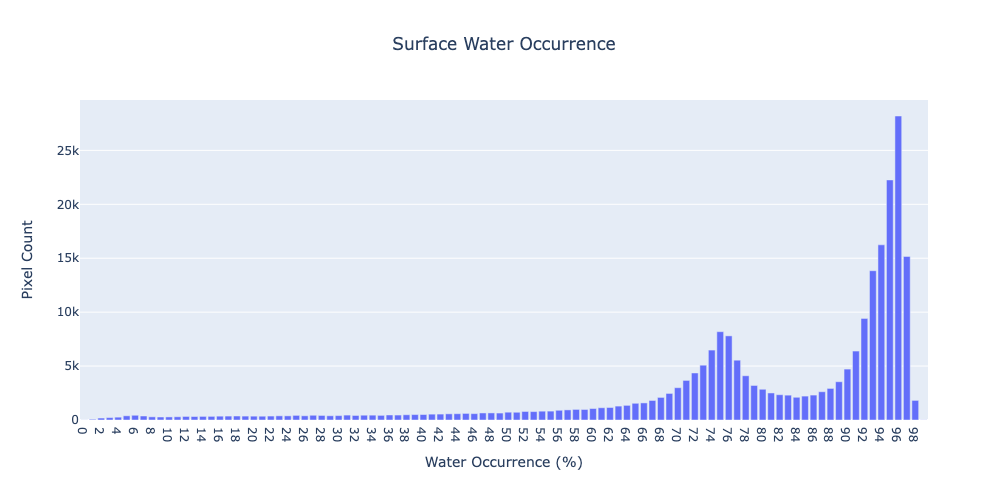

In [81]:
hist = geemap.image_histogram(
    image,
    region,
    scale=30,
    x_label='Water Occurrence (%)',
    y_label='Pixel Count',
    title='Surface Water Occurrence',
    layout_args={'title': dict(x=0.5)},
    return_df=False,
)
hist

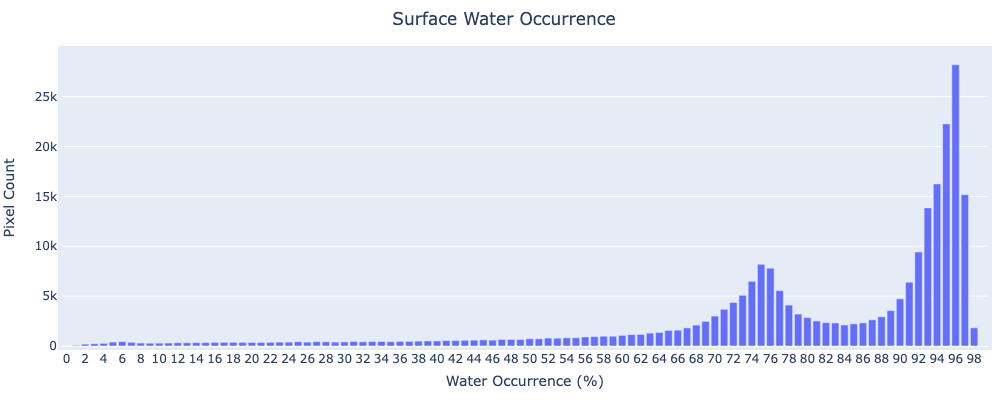

In [82]:
hist.update_layout(
    autosize=False,
    width=800,
    height=400,
    margin=dict(l=30, r=20, b=10, t=50, pad=4)
)

### Surface water monthly history

In [83]:
dataset = ee.ImageCollection('JRC/GSW1_4/MonthlyHistory')
dataset.size()

In [84]:
dataset.aggregate_array("system:index")

In [85]:
Map = geemap.Map()
Map

In [86]:
image = dataset.filterDate('2020-08-01', '2020-09-01').first()
region = Map.user_roi # Draw a polygon on the map
if region is None:
    region = ee.Geometry.BBox(-99.957, 46.8947, -99.278, 47.1531)
vis_params = {'min': 0.0, 'max': 2.0, 'palette': ['ffffff', 'fffcb8', '0905ff']}

Map.addLayer(image, vis_params, 'Water')
Map.addLayer(region, {}, 'ROI', True, 0.5)
Map.centerObject(region)

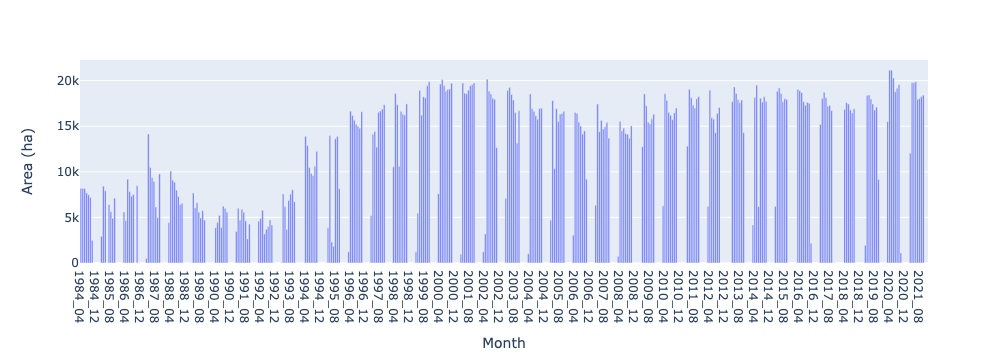

In [87]:
geemap.jrc_hist_monthly_history(
    region=region, scale=30, frequency='month', denominator=1e4, y_label='Area (ha)'
)

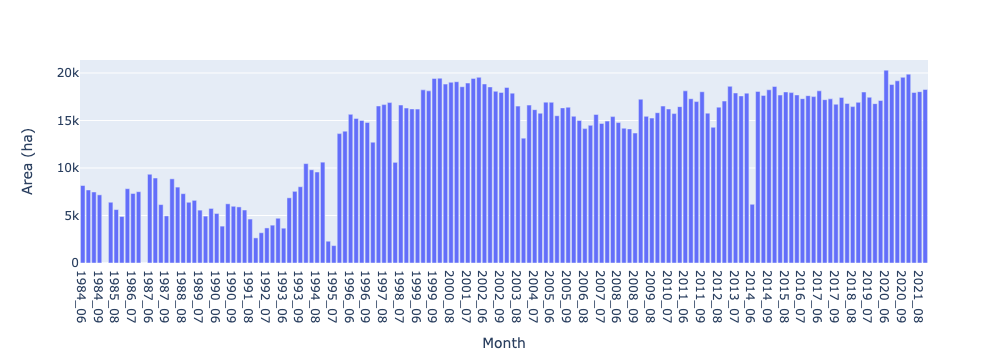

In [88]:
geemap.jrc_hist_monthly_history(
    region=region,
    start_month=6,
    end_month=9,
    scale=30,
    frequency='month',
    denominator=1e4,
    y_label='Area (ha)',
)

/Users/qswu/mambaforge/envs/geo/lib/python3.9/site-packages/geemap/common.py:13302: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



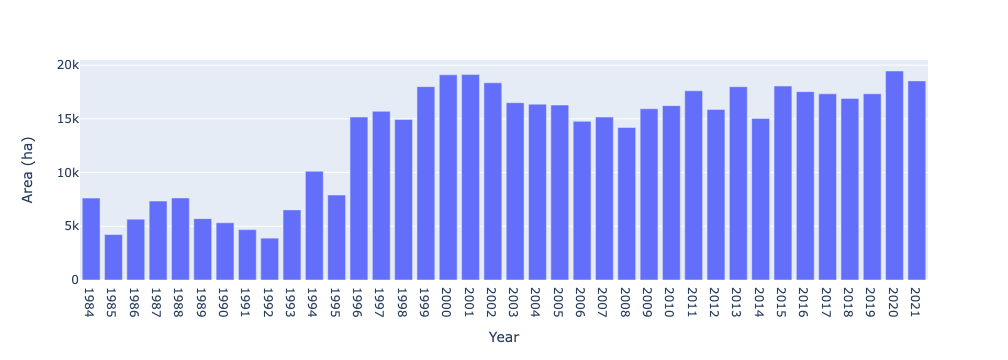

In [89]:
geemap.jrc_hist_monthly_history(
    region=region,
    start_month=6,
    end_month=9,
    scale=30,
    frequency='year',
    reducer='mean',
    denominator=1e4,
    y_label='Area (ha)',
)

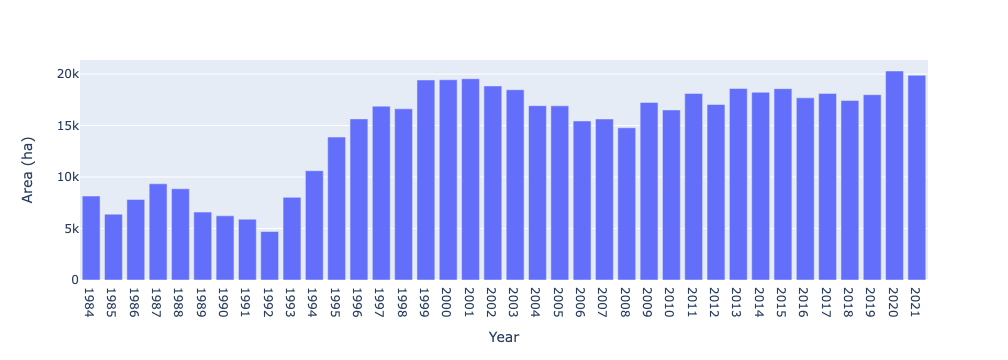

In [90]:
geemap.jrc_hist_monthly_history(
    region=region,
    start_month=6,
    end_month=9,
    scale=30,
    frequency='year',
    reducer='max',
    denominator=1e4,
    y_label='Area (ha)',
)